# Fashion MNIST with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU

Using TensorFlow backend.


In [2]:
print('Tensorflow version:', tf.__version__)
print('Keras Version:',keras.__version__)

Tensorflow version: 2.1.1
Keras Version: 2.3.0-tf


In [3]:
# Let's Load the Fashion MNIST Data Set

fashion_mnist = keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

Now, let's check the Shape, Type and Normalise the Images.  
Well before Normalising we will try to draw/display some images.  

In [4]:
print(X_train.shape)
print(X_train.dtype)

(60000, 28, 28)
uint8


This means that the images is represented in a **28x28** array rather than 1D Array. We can call it pixels also.

In [5]:
# defining our fashion MNIST Class/Target Labels
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(class_labels[y_train[5]])
print(class_labels[y_train[15]])
print(class_labels[y_train[50]])

Pullover
Ankle boot
Dress


Now, let's split the data for Validation since the data is already splitted into Train and Test.  
Also, we'll normalize the images by Dividing each image by 255.0, so that they scale between 0 to 1.

In [6]:
X_valid,X_train = X_train[:5000]/255.0,X_train[5000:]/255.0
y_valid,y_train = y_train[:5000],y_train[5000:]

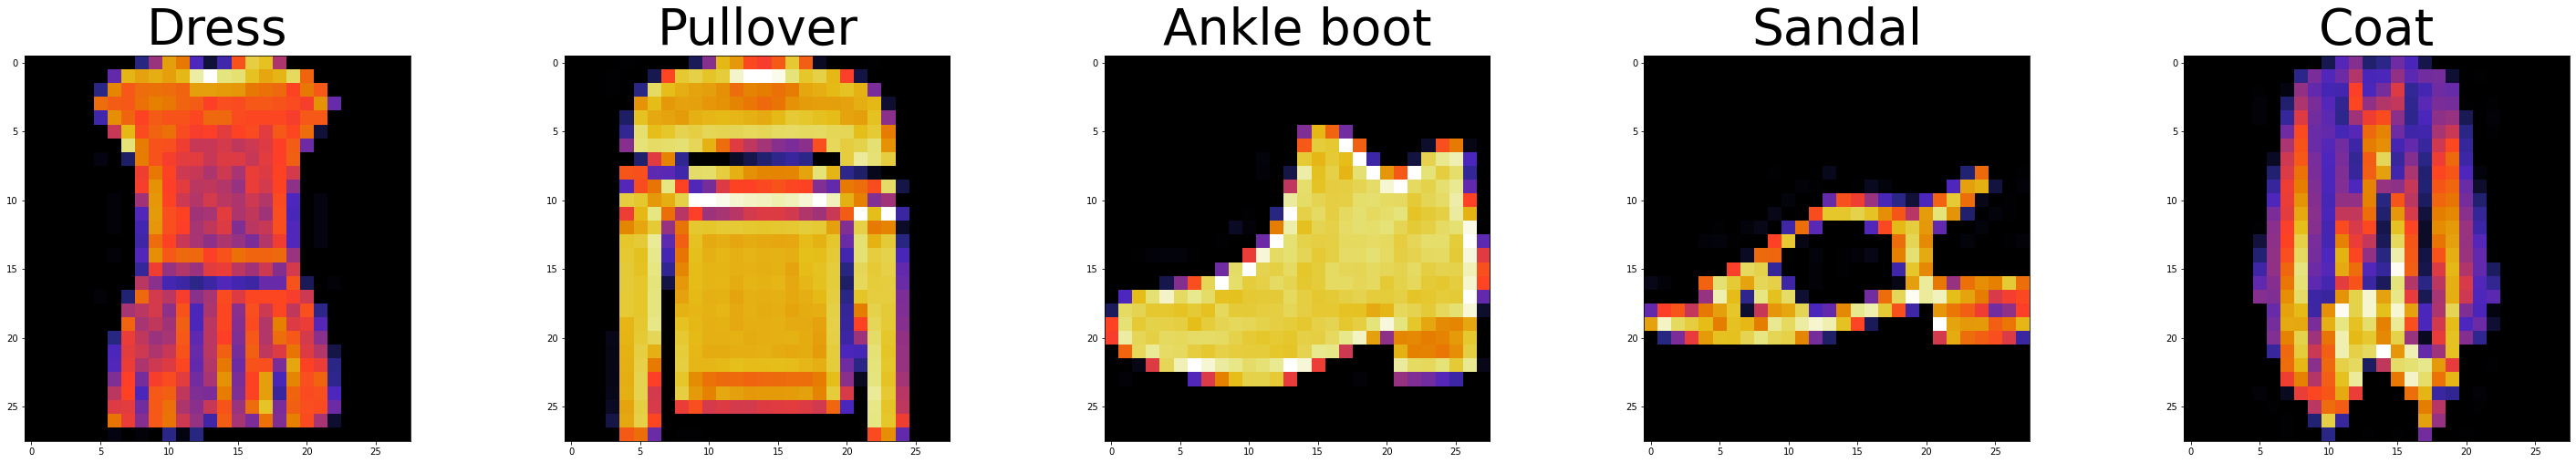

In [7]:
%matplotlib inline 

data_dress = X_valid[3]
title_dress = class_labels[y_valid[3]]

data_pullover = X_valid[5]
title_pullover = class_labels[y_valid[5]]

data_ankle_boot = X_valid[15]
title_ankle_boot = class_labels[y_valid[15]]


data_sandal = X_valid[467]
title_sandal = class_labels[y_valid[467]]

data_coat = X_train[467]
title_coat = class_labels[y_train[467]]


# Let's show a sample of Images
plt.figure(figsize=(50,50))
plt.subplot(1,5,1)
plt.subplots_adjust(wspace=0.4)

plt.imshow(data_dress, interpolation='nearest',cmap='CMRmap')
plt.title(title_dress,fontdict = {'fontsize' : 55})

plt.subplot(1,5,2)

plt.imshow(data_pullover, interpolation='nearest',cmap='CMRmap')
plt.title(title_pullover,fontdict = {'fontsize' : 55})

plt.subplot(1,5,3)

plt.imshow(data_ankle_boot, interpolation='nearest',cmap='CMRmap')
plt.title(title_ankle_boot,fontdict = {'fontsize' : 55})


plt.subplot(1,5,4)

plt.imshow(data_sandal, interpolation='nearest',cmap='CMRmap')
plt.title(title_sandal,fontdict = {'fontsize' : 55})

plt.subplot(1,5,5)

plt.imshow(data_coat, interpolation='nearest',cmap='CMRmap')
plt.title(title_coat,fontdict = {'fontsize' : 55})
plt.show()


# interpolation values can be: ['none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'.]
# cmap values cvan be :['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',]

### Let's Build the Sequential Model

In [8]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape=[28,28])) # Input Layer
model_1.add(keras.layers.Dense(300,activation = "relu")) # 1st Hidden Layer
model_1.add(keras.layers.Dense(100,activation = "relu")) # 2nd Hidden Layer
model_1.add(keras.layers.Dense(10,activation = "softmax")) # Output Layer with 10 Class Labels

In [9]:
print(model_1.summary())
print()
print('Model Layers:')
model_1.layers

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None

Model Layers:


In [10]:
hidden1 = model_1.layers[1]
model_1.get_layer('dense') is hidden1

True

In [11]:
weights,biases = hidden1.get_weights()
print('Hidden Layer 1 Weights: ', weights)
print()
print('Hidden Layer 1 Biases: ', biases)
print()
print('Hidden Layer 1 Weights Shape: ', weights.shape)
print()
print('Hidden Layer 1 Biases:Shape ', biases.shape)
print()

Hidden Layer 1 Weights:  [[-0.0364766  -0.06115742  0.00409164 ...  0.02390438 -0.01191336
  -0.04925635]
 [-0.01091852 -0.07191492  0.04697002 ... -0.03980887 -0.07191797
  -0.06785055]
 [-0.0340713  -0.02054712  0.00743883 ...  0.02168459  0.04881571
   0.05285217]
 ...
 [ 0.06329453 -0.01791241  0.07223962 ... -0.03006495 -0.04340857
  -0.00677691]
 [-0.0604188   0.04754546 -0.03856245 ... -0.02648698 -0.04625369
   0.04368   ]
 [-0.02209218  0.00146802  0.02539793 ...  0.03124885 -0.03204726
   0.05306701]]

Hidden Layer 1 Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0

If you see, the model has randomly initialised the Weights and Having Biases value as 0 is just fine.

pip install pydotplus

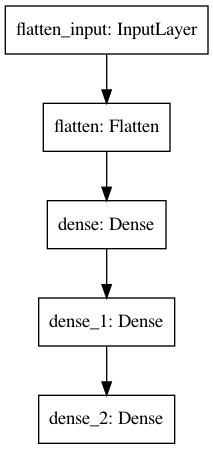

In [12]:
import pydot
import graphviz
import pydotplus
keras.utils.plot_model(model_1)

In [13]:
# Let's compile the Model
model_1.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

# Let's finally Train and Evaluate Model

history = model_1.fit(X_train,y_train,epochs = 30 , validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.7241 - accuracy: 0.7621 - val_loss: 0.5029 - val_accuracy: 0.8294
Epoch 2/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4893 - accuracy: 0.8290 - val_loss: 0.4625 - val_accuracy: 0.8400
Epoch 3/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4454 - accuracy: 0.8425 - val_loss: 0.4164 - val_accuracy: 0.8608
Epoch 4/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4186 - accuracy: 0.8527 - val_loss: 0.4066 - val_accuracy: 0.8612
Epoch 5/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3983 - accuracy: 0.8588 - val_loss: 0.3957 - val_accuracy: 0.8638
Epoch 6/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3823 - accuracy: 0.8645 - val_loss: 0.3913 - val_accuracy: 0.8636
Epoch 7/30
55000/55000 [==============================] -

In [14]:
model_1.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 56.6092 - accuracy: 0.8570


[56.60915665908912, 0.857]

In [15]:
# Let's compile the model using a Different Optimizer for better performance as we want to keep the epoch in range to 30 to 50 only
model_1.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'nadam',metrics = ['accuracy'])

# Let's finally Train and Evaluate Model

history = model_1.fit(X_train,y_train,epochs = 30 , validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 190us/sample - loss: 0.3591 - accuracy: 0.8693 - val_loss: 0.3705 - val_accuracy: 0.8646
Epoch 2/30
55000/55000 [==============================] - 9s 171us/sample - loss: 0.3142 - accuracy: 0.8845 - val_loss: 0.3146 - val_accuracy: 0.8854
Epoch 3/30
55000/55000 [==============================] - 9s 163us/sample - loss: 0.2925 - accuracy: 0.8903 - val_loss: 0.3380 - val_accuracy: 0.8806
Epoch 4/30
55000/55000 [==============================] - 9s 165us/sample - loss: 0.2771 - accuracy: 0.8962 - val_loss: 0.3048 - val_accuracy: 0.8898
Epoch 5/30
55000/55000 [==============================] - 10s 176us/sample - loss: 0.2616 - accuracy: 0.9010 - val_loss: 0.3156 - val_accuracy: 0.8890
Epoch 6/30
55000/55000 [==============================] - 9s 165us/sample - loss: 0.2493 - accuracy: 0.9070 - val_loss: 0.3149 - val_accuracy: 0.8932
Epoch 7/30
55000/55000 [=========================

In [16]:
model_1.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 96.4436 - accuracy: 0.8726


[96.4436272002697, 0.8726]

We see that in the end, loss started to increase and so does our train accuracy. Since the **Accuracy vs test Accuracy** is in approx 5 to 6% difference, we can consider this model.  
But let's try more optimisation techniques, like chnaging the batch size, using another optimizer, or tuning the layers.  Let's plot the loss,accuracy and val_loss

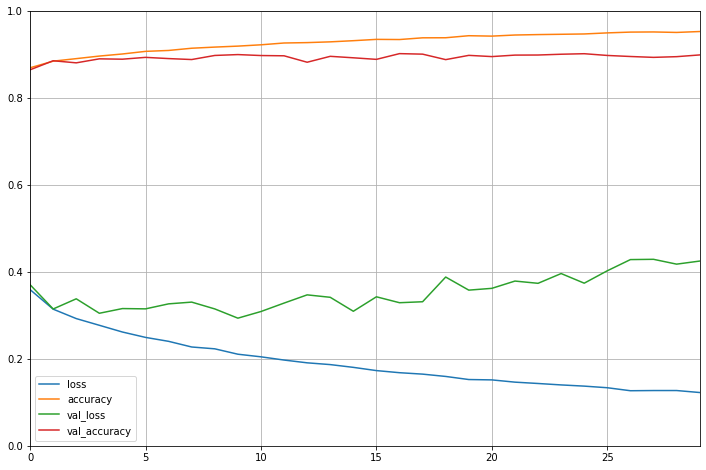

In [17]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Let's try building another Model with adding one more layer

In [18]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape = [28,28]))
model_2.add(keras.layers.Dense(300,activation = "relu"))
model_2.add(keras.layers.Dense(100,activation = "relu"))
model_2.add(keras.layers.Dense(50,activation = "relu"))
model_2.add(keras.layers.Dense(10,activation = "softmax"))

print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________
None


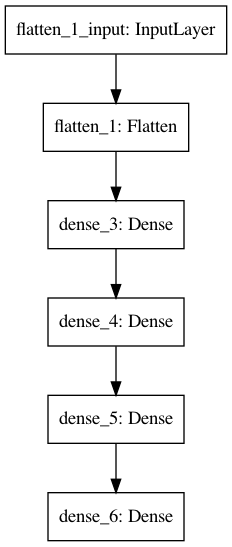

In [19]:
keras.utils.plot_model(model_2)

In [20]:
# Let's compile the model using a Different Optimizer for better performance as we want to keep the epoch in range to 30 to 50 only
model_2.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'nadam',metrics = ['accuracy'])

# Let's finally Train and Evaluate Model

history = model_2.fit(X_train,y_train,epochs = 30 , validation_data=(X_valid,y_valid),batch_size=64)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5100 - accuracy: 0.8178 - val_loss: 0.4213 - val_accuracy: 0.8448
Epoch 2/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3596 - accuracy: 0.8681 - val_loss: 0.3531 - val_accuracy: 0.8748
Epoch 3/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.3211 - accuracy: 0.8807 - val_loss: 0.3237 - val_accuracy: 0.8796
Epoch 4/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.2949 - accuracy: 0.8905 - val_loss: 0.3886 - val_accuracy: 0.8628
Epoch 5/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2764 - accuracy: 0.8968 - val_loss: 0.3115 - val_accuracy: 0.8862
Epoch 6/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.2614 - accuracy: 0.9016 - val_loss: 0.3395 - val_accuracy: 0.8764
Epoch 7/30
55000/55000 [==============================] -

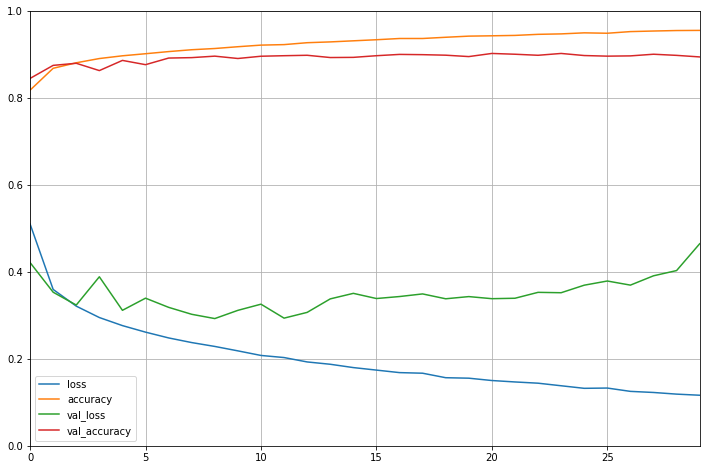

In [21]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

For the first time, our Validation Accuracy crossed 90%, that is a good sign and just by looking at the Graph, we can say, that this time we actually managed our Validation Loss not to behave weird. Given a bunch of more epochs and reducing batch_size argument, will definitely gives us much better result.

In [22]:
# Let's make some predictions!

model_2.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 95.6297 - accuracy: 0.8601


[95.62971302490234, 0.8601]

In [23]:
X_new = X_test[:3]
y_proba_model_1 = model_1.predict(X_new)
y_proba_model_2 = model_2.predict(X_new)

In [24]:
y_pred_model1 = model_1.predict_classes(X_new)
y_pred_model2 = model_1.predict_classes(X_new)

In [25]:
print(y_pred_model1)
print(y_pred_model2)

[9 2 1]
[9 2 1]


In [26]:
y_pred_model1

array([9, 2, 1])

In [27]:
print(np.array(class_labels)[y_pred_model1])
print(np.array(class_labels)[y_pred_model2])

['Ankle boot' 'Pullover' 'Trouser']
['Ankle boot' 'Pullover' 'Trouser']


Just One more small thing as Enhancement. We will use **Early Stopping Criteria**, so that using large number of epochs doesn't harm the model

In [28]:
early_stoppping_cb = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights=True)
check_point_cb = keras.callbacks.ModelCheckpoint("BestModel_Saved.h5",save_best_only=True)
history = model_2.fit(X_train,y_train,epochs = 100 , validation_data=(X_valid,y_valid),batch_size=16,callbacks=[early_stoppping_cb,check_point_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 13s 229us/sample - loss: 0.2223 - accuracy: 0.9182 - val_loss: 0.3543 - val_accuracy: 0.8950
Epoch 2/100
55000/55000 [==============================] - 17s 312us/sample - loss: 0.1913 - accuracy: 0.9290 - val_loss: 0.3830 - val_accuracy: 0.8842
Epoch 3/100
55000/55000 [==============================] - 17s 311us/sample - loss: 0.1848 - accuracy: 0.9309 - val_loss: 0.3625 - val_accuracy: 0.8928
Epoch 4/100
55000/55000 [==============================] - 15s 265us/sample - loss: 0.1816 - accuracy: 0.9326 - val_loss: 0.3697 - val_accuracy: 0.8922
Epoch 5/100
55000/55000 [==============================] - 14s 250us/sample - loss: 0.1741 - accuracy: 0.9340 - val_loss: 0.3837 - val_accuracy: 0.8956
Epoch 6/100
55000/55000 [==============================] - 15s 264us/sample - loss: 0.1725 - accuracy: 0.9370 - val_loss: 0.3867 - val_accuracy: 0.8920
Epoch 7/100
55000/55000 [==============

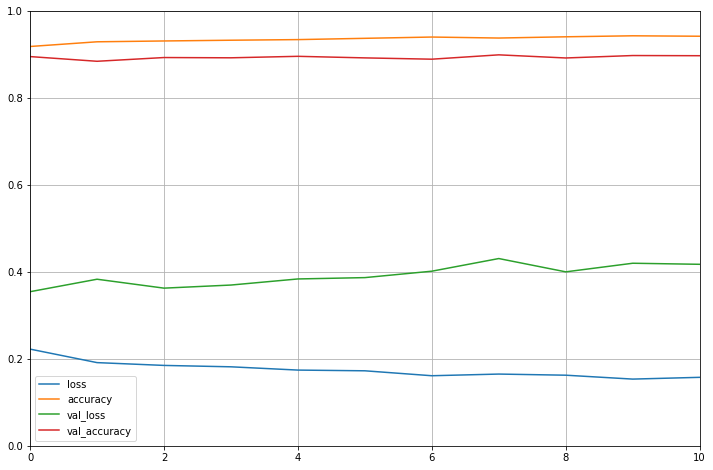

In [29]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model_2.evaluate(X_test,y_test)


10000/10000 [==============================] - 0s 30us/sample - loss: 65.2133 - accuracy: 0.8631


[65.21331903029723, 0.8631]

In [31]:
X_new = X_test[:12]
y_proba = model_2.predict(X_new)
print(y_proba)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [32]:
y_pred = model_2.predict_classes(X_new)
print(y_pred)
print(np.array(class_labels)[y_pred])

[9 2 1 1 0 1 4 6 5 7 4 5]
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'T-shirt/top' 'Trouser'
 'Coat' 'Shirt' 'Sandal' 'Sneaker' 'Coat' 'Sandal']


Voila! We did some basic Neural Network Work where we used the Fashion Data and build a Sequential Model over it. We used **SGD and NADAM** both where NADAM turned out be better than SGD becasue is tunes the learning rate while training only. Next we also increased the Depth of the Neural Network which turned out be cheery over the cake as we managed to pass the **val_accuracy** over 90%.

Next, we can do is we change the ration of the Data that is being split into Validate and Train.

# Thank You!